In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd


'''
plt.ion()

while True:
    data = pd.read_csv("output.csv")
    lm = data['left motor'].values
    rm = data['right motor'].values
    clear_output(wait=True)
    xplot = np.arange(0, data.shape[0]/20, 0.05)
    plt.plot(xplot, lm, label='left-motor')
    plt.plot(xplot, rm, label='right-motor')
    #print(len(xplot))
    #data.plot(x=data['left sensor'], y=data['left motor'])
    #y = np.random.random()
    #plt.scatter(i, y)
    #clear_output(wait=True)
    #print(data.shape[0])
    plt.pause(1)

while True:
    clear_output()
    plt.pause(1)
#clear_output()
'''

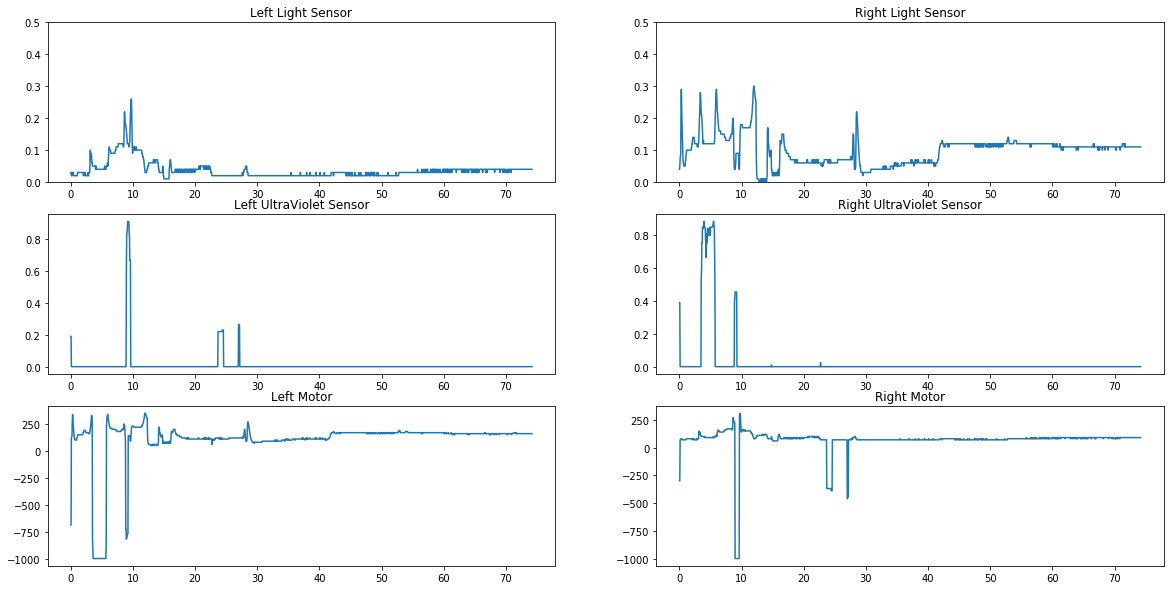

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd

plt.ion()

#grid.canvas.draw()

while True:
    grid = plt.figure(figsize=(20,10))
    ls = grid.add_subplot(321)
    plt.title("Left Light Sensor")
    rs = grid.add_subplot(322)
    plt.title("Right Light Sensor")
    luv = grid.add_subplot(323)
    plt.title("Left UltraViolet Sensor")
    ruv = grid.add_subplot(324)
    plt.title("Right UltraViolet Sensor")
    lm = grid.add_subplot(325)
    plt.title("Left Motor")
    rm = grid.add_subplot(326)
    plt.title("Right Motor")

    data = pd.read_csv("output.csv")
    time = np.arange(0, data.shape[0]/20, 0.05)
    lmv = data['left motor'].values
    rmv = data['right motor'].values
    lsv = data['left sensor'].values
    rsv = data['right sensor'].values
    luvv = data['left ultraviolet sensor'].values
    ruvv = data['right ultraviolet sensor'].values
    
    ls.plot(time, lsv, label='left-light')
    ls.set_ylim(0, 0.5)
    
    rs.plot(time, rsv, label='right-light')
    rs.set_ylim(0, 0.5)

    luv.plot(time, luvv, label='left-uv')
    luv.set_ylim(0, 0.8)
    luv.autoscale(enable=True,axis='both')
    
    ruv.plot(time, ruvv, label='right-uv')
    ruv.set_ylim(0, 0.8)
    ruv.autoscale(enable=True,axis='both')
    
    lm.plot(time, lmv, label='left-motor')
    lm.set_ylim(-500, 500)
    lm.autoscale(enable=True,axis='both')

    rm.plot(time, rmv, label='right-motor')
    rm.set_ylim(-500, 500)
    rm.autoscale(enable=True,axis='both')
    
    clear_output(wait=True)
    plt.pause(1)
    
    #plt.plot(xplot, lm, label='left-motor')
    #plt.plot(xplot, rm, label='right-motor')
    #print(len(xplot))
    #data.plot(x=data['left sensor'], y=data['left motor'])
    #y = np.random.random()
    #plt.scatter(i, y)
    #clear_output(wait=True)
    #print(data.shape[0])
    
    
while True:
    clear_output(wait=True)
    plt.pause(1)
#clear_output()
